In [329]:
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

## Dataset
* Dataset para prever se existe uma estrutura na atmosfera ou se não de acordo com retornos de um radar (Ionosphere Dataset Description)
* Y categorias b - bad ou g - good

In [156]:
path = '/home/silvio/git/datasets/ionosphere.csv'

df = read_csv(path, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [95]:
df.values[:, :-1]

array([[1, 0, 0.99539, ..., -0.54487, 0.18641, -0.453],
       [1, 0, 1.0, ..., -0.06287999999999999, -0.13738, -0.02447],
       [1, 0, 1.0, ..., -0.2418, 0.56045, -0.38238],
       ...,
       [1, 0, 0.94701, ..., 0.00442, 0.9269700000000001, -0.00577],
       [1, 0, 0.9060799999999999, ..., -0.03757, 0.87403, -0.16243],
       [1, 0, 0.8471, ..., -0.06677999999999999, 0.85764, -0.06151]],
      dtype=object)

In [330]:
df.values[:, -1]

array(['g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g',
       'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b',
       'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b', 'g', 'b

## Dataset Veltec

In [158]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

le = preprocessing.LabelEncoder()

df_clf = pd.read_csv('/home/silvio/git/exercicio-DL/veltec_clas.csv')

df_clf["clas_score_geral2"] = le.fit_transform(df_clf["clas_score_geral"])
y=df_clf["clas_score_geral2"]
X=df_clf[["id_vei","id_motorista","distancia_percorrida","tempo_em_direcao"]]
print(X)
print(y)

       id_vei  id_motorista  distancia_percorrida  tempo_em_direcao
0       47119           NaN                659475             36992
1       64939      190228.0                739940             40174
2       64939      190228.0                222870             10893
3       65646           NaN                260745             20418
4       34323      395757.0                388865             20848
...       ...           ...                   ...               ...
62588   42462      626009.0                 81599              5592
62589   42462      448430.0                 74083              4469
62590   42462      448430.0                122575             10238
62591   42462           NaN                 14356              2778
62592   75920      203694.0                 54695              3985

[62593 rows x 4 columns]
0        4
1        4
2        4
3        4
4        4
        ..
62588    4
62589    4
62590    4
62591    4
62592    4
Name: clas_score_geral2, Length: 6259

## Criando Rede Neural com Pytorch
* Preparar os dados
* definir o modelo
* treinar o modelo
* avaliar o modelo
* Predição


## Função que utiliza a classe dataset para realizar a preparação de dados

* classe especializada para controlar acesso aos dados
* Transformar entrada e saída para modo numérico
* Configurações no dataset
    * normalização
    * codificação
    *etc
    
* Normalmente é realizado override das funções:
    * __len__() retorna tamannho do dataset
    * __getitem__() obtém uma amostra pelo índice


In [331]:
# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)
        #print(df)
        #df["clas_score_geral2"] = le.fit_transform(df["clas_score_geral"])
        #y=df_clf["clas_score_geral2"]
        #X=df_clf[["id_vei","id_motorista","distancia_percorrida","tempo_em_direcao"]]

        
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        
        #self.X = df_clf[["id_vei","id_motorista","distancia_percorrida","tempo_em_direcao"]]
        #self.y = df_clf["clas_score_geral"]

        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]
 
    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

## Cria estruturas DataLoader para padronizar a leitura de dados

In [332]:
# prepare the dataset
def prepare_data(path):
    # Carrega Dataset
    dataset = CSVDataset(path)
    # realiza split
    train, test = dataset.get_splits()
    # monta data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    #test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    test_dl = DataLoader(test, batch_size=32, shuffle=False)
    
    return train_dl, test_dl

## Função para treino do modelo

* Extendendo classo torch.nn.Module
    * Modelos genéricos de rede Neural

* contrutor da classe define as camadas do modelo 
* função forward () é a substituição que define como encaminhar a propagação de entrada pelas camadas definidas do modelo.

* Pode ser definida a camada Linear para camadas totalmente conectadas e Conv2d para camadas convolucionais

* funções de ativação também podem ser definidas como camadas, como ReLU, Softmax e Sigmoid.


In [333]:
class MLP(Module):
    # Elementos do modelo
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # camada de entrada
        self.hidden1 = Linear(n_inputs, 10)
        # Inicialização da camada de entrada
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        # Ativação da camada de entrada
        self.act1 = ReLU()
        # segunda camada , entrada tem que ser do mesmo tamanho da saida da camada 1
        self.hidden2 = Linear(10, 8)
        # Inicialização da camada
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        # Ativação da camada
        self.act2 = ReLU()
        # camada de saída
        self.hidden3 = Linear(8, 1)
        # Inicialização da camada
        xavier_uniform_(self.hidden3.weight)
        # Ativação da camada
        self.act3 = Sigmoid()
 
    # propagação da entrada pelas camadas
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        return X

## O processo de treinamento 

* definir uma função de perda e um algoritmo de otimização.

* funções comuns de perda:
    * BCELoss: Perda de entropia cruzada binária para classificação binária.
    * CrossEntropyLoss: perda de entropia cruzada categórica para classificação de várias classes.
    * MSELoss: perda quadrática média para regressão.

* SGD é o algortimo de otimização padrão

## treinamento do modelo
* enumeração do DataLoader para o conjunto de dados de treinamento.

* loop para o número de épocas de treinamento. 
    * loop interno para os mini-lotes para a descida do gradiente estocástico.

## Cada atualização do modelo envolve o mesmo padrão geral:

* Limpando o último gradiente de erro.
* Uma passagem (forward) direta da entrada pelo modelo.
* Calculando a perda para a saída do modelo.
* Retropropagando o erro através do modelo.
* Atualize o modelo em um esforço para reduzir a perda. (otimização)

In [341]:
# train the model
def train_model(train_dl, model):
    # define loss
    criterion = BCELoss()
    # define otimizador
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # loop por épocas
    for epoch in range(100):
        # Loop em conjunto de mini-batches
        for i, (inputs, targets) in enumerate(train_dl):
            # zera os gradientes do batches
            optimizer.zero_grad()
            # predição do batch
            yhat = model(inputs)
            # calcula loss
            loss = criterion(yhat, targets)
            # Retroprapagando erros 
            loss.backward()
            # atualiza pesos (otimização )
            optimizer.step()
            #print(loss)

## Avaliação do modelo

In [342]:
# evaluate the model
def evaluate_model(test_dl, model):
    # Cria lista de preditos e reais
    predictions, actuals = list(), list()

    # percorre lista do dataloader de test
    for i, (inputs, targets) in enumerate(test_dl):
        # realiza predição
        yhat = model(inputs)
        # cria numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round valores da classe
        yhat = yhat.round()
        # armazena
        predictions.append(yhat)
        actuals.append(actual)
        
    predictions, actuals = vstack(predictions), vstack(actuals)
    # usa sklearn para calcular acurácia
    acc = accuracy_score(actuals, predictions)
    return acc

## Recebe uma linha do dataset e calcula a predição

In [343]:
def predict(row, model):
    # convert linha do dataset para tensor
    row = Tensor([row])
    # predição
    yhat = model(row)
    # retorna valor predito
    yhat = yhat.detach().numpy()
    return yhat

In [344]:
# Prepara os dados
path = '/home/silvio/git/datasets/ionosphere.csv'
#path = '/home/silvio/git/exercicio-DL/veltec_clas.csv'

train_dl, test_dl = prepare_data(path)

print(len(train_dl.dataset), len(test_dl.dataset))

# criar modelo
model = MLP(34)
# treina o modelo
train_model(train_dl, model)
# avalia
acc = evaluate_model(test_dl, model)
print('Acuracia: %.3f' % acc)
# testa uma predição
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = predict(row, model)
print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))

235 116
Acuracia: 0.922
Predicted: 1.000 (class=1)


## PyTorch para CNN

## Utiliza função interna do torch para carregar mnist

0


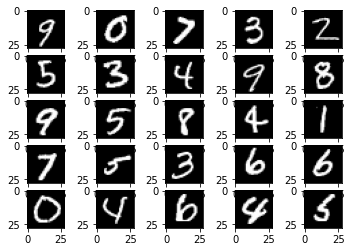

In [345]:
# load mnist dataset in pytorch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
from matplotlib import pyplot

# define location to save or load the dataset
path = '~/.torch/datasets/mnist'

# define the transforms to apply to the data
trans = Compose([ToTensor()])

# download and define the datasets
train = MNIST(path, train=True, download=True, transform=trans)
test = MNIST(path, train=False, download=True, transform=trans)

# define how to enumerate the datasets
train_dl = DataLoader(train, batch_size=32, shuffle=True)
test_dl = DataLoader(test, batch_size=32, shuffle=True)

# get one batch of images
i, (inputs, targets) = next(enumerate(train_dl))
print(i)
# plot some images
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, i+1)
    # plot raw pixel data
    pyplot.imshow(inputs[i][0], cmap='gray')
# show the figure
pyplot.show()

## Função para carregar dados de arquivos
* Adicionando collate_fn=utils.collate_fn para montar mini-batches

In [349]:
!ls /home/silvio/git/datasets/dogsCatsDB/trainGEN/

cats  dogs


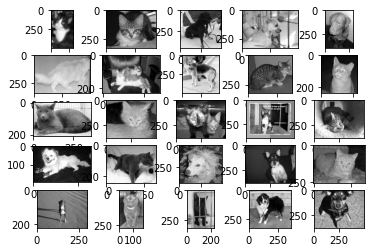

In [354]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
from matplotlib import pyplot
import utils

trans = Compose([ToTensor()])

train = ImageFolder(root='/home/silvio/git/datasets/dogsCatsDB/trainGEN', transform=trans)
test = ImageFolder(root='/home/silvio/git/datasets/dogsCatsDB/testGEN', transform=trans)

train_dl = DataLoader(train, batch_size=32, shuffle=True, collate_fn=utils.collate_fn)
test_dl = DataLoader(test, batch_size=32, shuffle=True, collate_fn=utils.collate_fn)

# get one batch of images
i, (inputs, targets) = next(enumerate(train_dl))

# plot some images
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, i+1)
    # plot raw pixel data
    pyplot.imshow(inputs[i][0], cmap='gray')
# show the figure
pyplot.show()


## Função de preparação de dados para Mnist

In [355]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import utils

def prepare_data(path):

    trans = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])   

    train = MNIST(path, train=True, download=True, transform=trans)
    test = MNIST(path, train=False, download=True, transform=trans)

    train_dl = DataLoader(train, batch_size=64, shuffle=True)
    test_dl = DataLoader(train, batch_size=1024, shuffle=False)
    
    return train_dl, test_dl

## Função preparada para ler dados de arquivos

In [325]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import utils

def prepare_data(path):

    trans = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])   

    #train = MNIST(path, train=True, download=True, transform=trans)
    #test = MNIST(path, train=False, download=True, transform=trans)
    
    train = ImageFolder(root='/home/silvio/git/datasets/dogsCatsDB/trainGEN', transform=trans)
    test = ImageFolder(root='/home/silvio/git/datasets/dogsCatsDB/testGEN', transform=trans)

    train_dl = DataLoader(train, batch_size=64, shuffle=True, collate_fn=utils.collate_fn)
    test_dl = DataLoader(train, batch_size=1024, shuffle=False, collate_fn=utils.collate_fn)
    
    return train_dl, test_dl

In [356]:
# prepare the dataset
def prepare_data(path):
    # define standardization
    trans = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])
    # load dataset
    train = MNIST(path, train=True, download=True, transform=trans)
    test = MNIST(path, train=False, download=True, transform=trans)
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=64, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

In [357]:
# pytorch cnn for multiclass classification
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.metrics import accuracy_score
from torchvision.datasets import MNIST
from torchvision.transforms import Compose
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize
from torch.utils.data import DataLoader
from torch.nn import Conv2d
from torch.nn import MaxPool2d
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Softmax
from torch.nn import Module
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
 
# model definition
class CNN(Module):
    # define model elements
    def __init__(self, n_channels):
        super(CNN, self).__init__()
        # input to first hidden layer
        self.hidden1 = Conv2d(n_channels, 32, (3,3))
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # first pooling layer
        self.pool1 = MaxPool2d((2,2), stride=(2,2))
        # second hidden layer
        self.hidden2 = Conv2d(32, 32, (3,3))
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # second pooling layer
        self.pool2 = MaxPool2d((2,2), stride=(2,2))
        # fully connected layer
        self.hidden3 = Linear(5*5*32, 100)
        kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        self.act3 = ReLU()
        # output layer
        self.hidden4 = Linear(100, 10)
        
        xavier_uniform_(self.hidden4.weight)
        self.act4 = Softmax(dim=1)
 
    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.pool1(X)
        # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.pool2(X)
        # flatten
        X = X.view(-1, 4*4*50)
        # third hidden layer
        X = self.hidden3(X)
        X = self.act3(X)
        # output layer
        X = self.hidden4(X)
        X = self.act4(X)
        return X
 
 
# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(2):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()
 
# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        # convert to class labels
        yhat = argmax(yhat, axis=1)
        # reshape for stacking
        actual = actual.reshape((len(actual), 1))
        yhat = yhat.reshape((len(yhat), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc
 
# prepare the data
path = '~/.torch/datasets/mnist'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = CNN(1)
# # train the model
train_model(train_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)

60000 10000
Accuracy: 0.885
